In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier,IsolationForest
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error,confusion_matrix,accuracy_score,classification_report
from sklearn.model_selection import train_test_split, cross_val_score,RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder,StandardScaler


In [42]:
df = pd.read_csv("Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")

In [43]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [44]:
df.tail()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
225740,61374,61,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225741,61378,72,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225742,61375,75,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225743,61323,48,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225744,61326,68,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225745 entries, 0 to 225744
Data columns (total 79 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Destination Port             225745 non-null  int64  
 1    Flow Duration                225745 non-null  int64  
 2    Total Fwd Packets            225745 non-null  int64  
 3    Total Backward Packets       225745 non-null  int64  
 4   Total Length of Fwd Packets   225745 non-null  int64  
 5    Total Length of Bwd Packets  225745 non-null  int64  
 6    Fwd Packet Length Max        225745 non-null  int64  
 7    Fwd Packet Length Min        225745 non-null  int64  
 8    Fwd Packet Length Mean       225745 non-null  float64
 9    Fwd Packet Length Std        225745 non-null  float64
 10  Bwd Packet Length Max         225745 non-null  int64  
 11   Bwd Packet Length Min        225745 non-null  int64  
 12   Bwd Packet Length Mean       225745 non-nul

In [46]:
df.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,225745.00000,2.257450e+05,225745.000000,225745.000000,225745.000000,2.257450e+05,225745.000000,225745.000000,225745.000000,225745.000000,...,225745.000000,225745.000000,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05
mean,8879.61946,1.624165e+07,4.874916,4.572775,939.463346,5.960477e+03,538.535693,27.882221,164.826715,214.907242,...,3.311497,21.482753,1.848261e+05,1.293436e+04,2.080849e+05,1.776201e+05,1.032214e+07,3.611943e+06,1.287813e+07,7.755355e+06
std,19754.64740,3.152437e+07,15.422874,21.755356,3249.403484,3.921834e+04,1864.128991,163.324159,504.892965,797.411073,...,12.270018,4.166799,7.979250e+05,2.102737e+05,9.002350e+05,7.842602e+05,2.185303e+07,1.275689e+07,2.692126e+07,1.983109e+07
min,0.00000,-1.000000e+00,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,80.00000,7.118000e+04,2.000000,1.000000,26.000000,0.000000e+00,6.000000,0.000000,6.000000,0.000000,...,1.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,80.00000,1.452333e+06,3.000000,4.000000,30.000000,1.640000e+02,20.000000,0.000000,8.666667,5.301991,...,2.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,80.00000,8.805237e+06,5.000000,5.000000,63.000000,1.160100e+04,34.000000,6.000000,32.000000,10.263203,...,4.000000,20.000000,1.878000e+03,0.000000e+00,1.878000e+03,1.862000e+03,8.239725e+06,0.000000e+00,8.253838e+06,7.422849e+06
max,65532.00000,1.199999e+08,1932.000000,2942.000000,183012.000000,5.172346e+06,11680.000000,1472.000000,3867.000000,6692.644993,...,1931.000000,52.000000,1.000000e+08,3.950000e+07,1.000000e+08,1.000000e+08,1.200000e+08,6.530000e+07,1.200000e+08,1.200000e+08


Dataframe'in kolonlarına bakıldığında gereksiz boşluklar bulunmaktadır. Bu yüzden kolonlarda ki gereksiz boşluklar kaldırılmıştır.

In [47]:
df.columns = df.columns.str.strip()


In [48]:
df.isna().sum()

Destination Port               0
Flow Duration                  0
Total Fwd Packets              0
Total Backward Packets         0
Total Length of Fwd Packets    0
                              ..
Idle Mean                      0
Idle Std                       0
Idle Max                       0
Idle Min                       0
Label                          0
Length: 79, dtype: int64

In [49]:
df.isna().any().all()

False

In [50]:
df.dtypes

Destination Port                 int64
Flow Duration                    int64
Total Fwd Packets                int64
Total Backward Packets           int64
Total Length of Fwd Packets      int64
                                ...   
Idle Mean                      float64
Idle Std                       float64
Idle Max                         int64
Idle Min                         int64
Label                           object
Length: 79, dtype: object

In [51]:
df.dtypes.unique()

array([dtype('int64'), dtype('float64'), dtype('O')], dtype=object)

In [52]:
df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna(axis=1)


In [53]:
numbers = df.select_dtypes(np.number)
df[numbers.columns]= numbers.round().astype('int32')

In [54]:
#import pandas_profiling

#profile = pandas_profiling.ProfileReport(df.sample(10000))
#profile.to_file(output_file="Ddos Dataset Analysis.html")

# Data Visualization for EDA

<AxesSubplot:xlabel='Label', ylabel='count'>

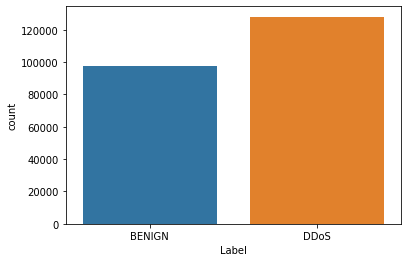

In [43]:
sns.countplot(x='Label', data= df)


<AxesSubplot:xlabel='Total Fwd Packets'>

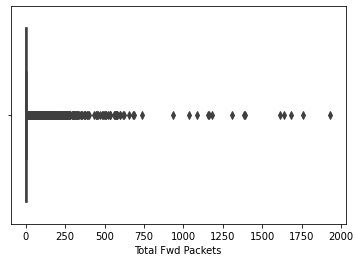

In [54]:
sns.boxplot(x='Total Fwd Packets', data=df)

Total Backward Packets için outlier olup olmadğının kontrolü

<AxesSubplot:xlabel='Total Backward Packets'>

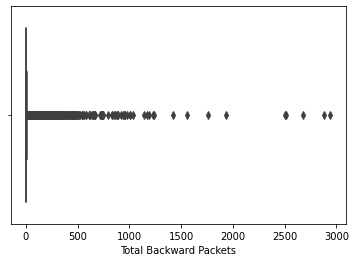

In [47]:
sns.boxplot(x='Total Backward Packets', data=df)

<AxesSubplot:xlabel='Label', ylabel='Idle Mean'>

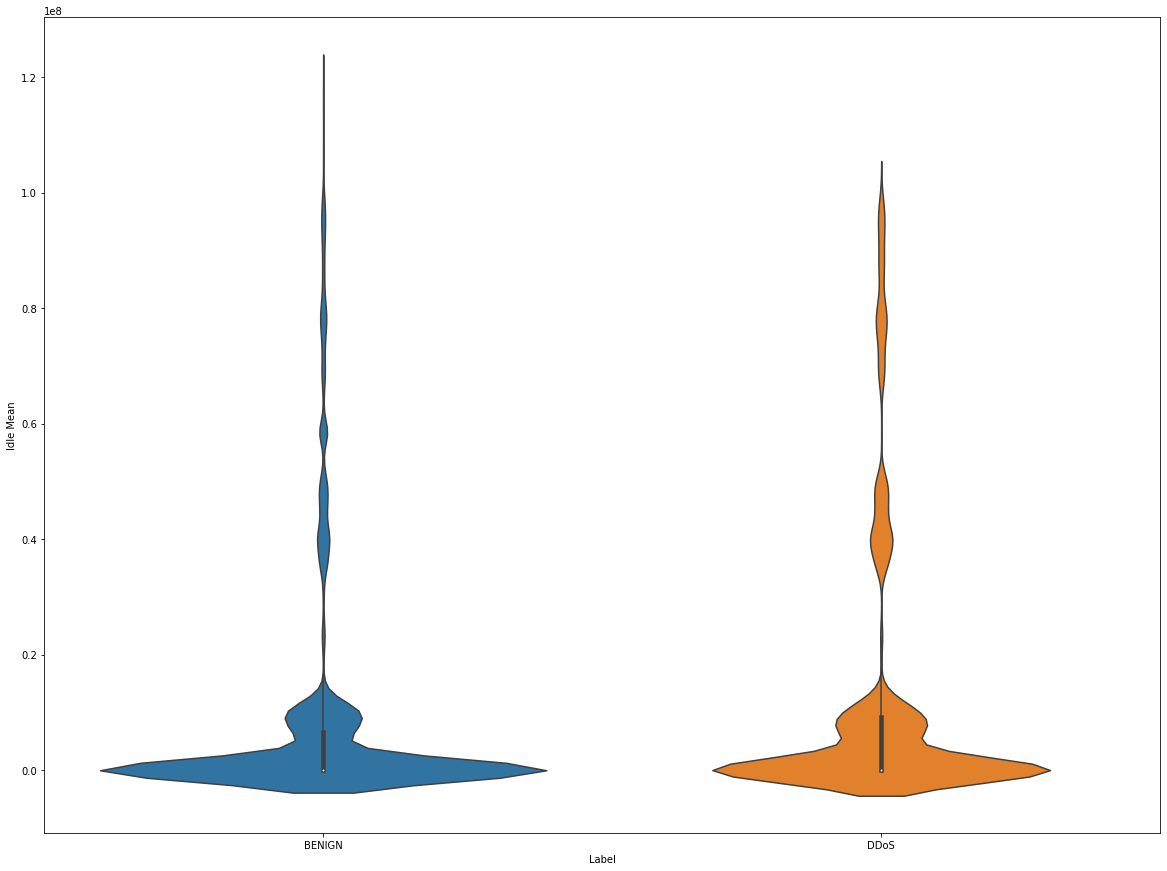

In [55]:
plt.figure(figsize=(20,15))
sns.violinplot(x = 'Label', y= 'Idle Mean', data = df, orient='v')


<AxesSubplot:xlabel='Bwd IAT Mean', ylabel='Fwd IAT Mean'>

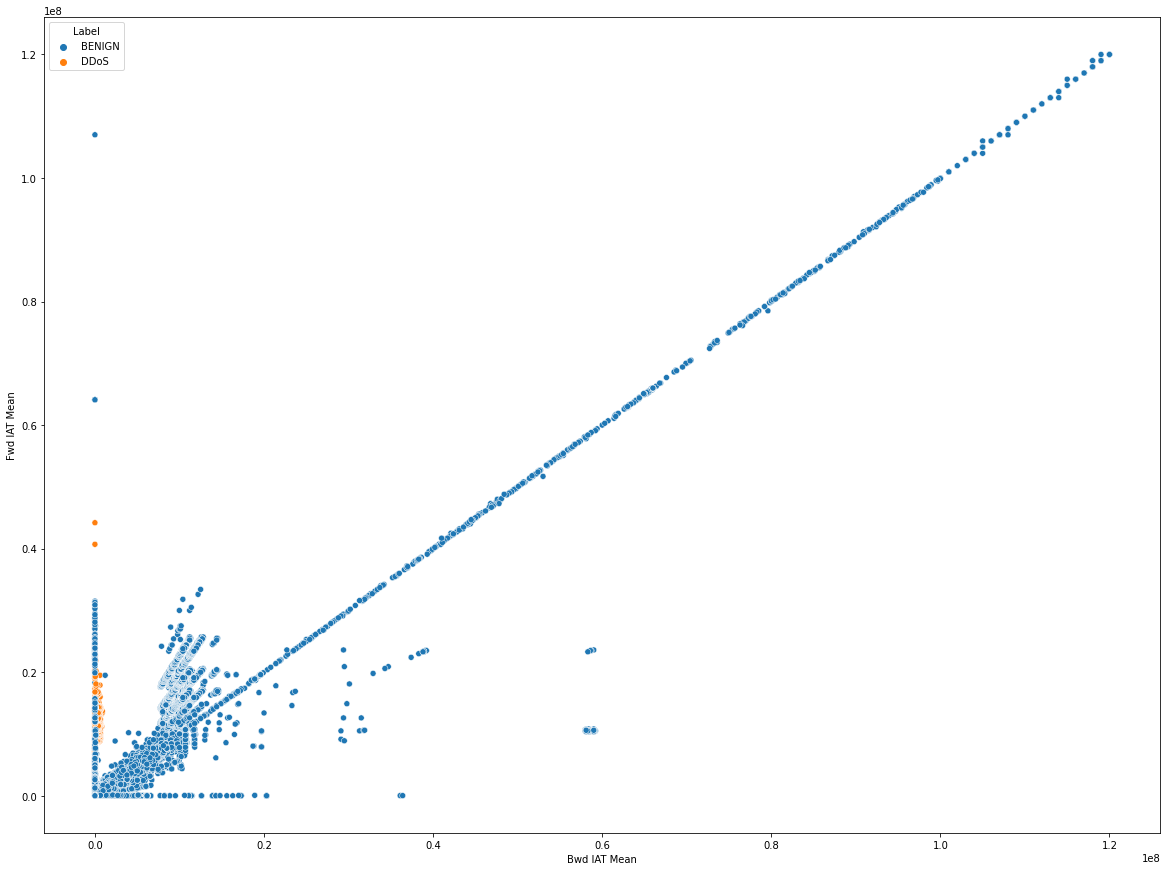

In [56]:
plt.figure(figsize=(20,15))
# plt.scatter(df['Total Fwd Packets'],df['Total Backward Packets'])
sns.scatterplot(x = 'Bwd IAT Mean', y = 'Fwd IAT Mean', hue= 'Label', data = df)


<AxesSubplot:xlabel='Bwd IAT Total', ylabel='Fwd IAT Total'>

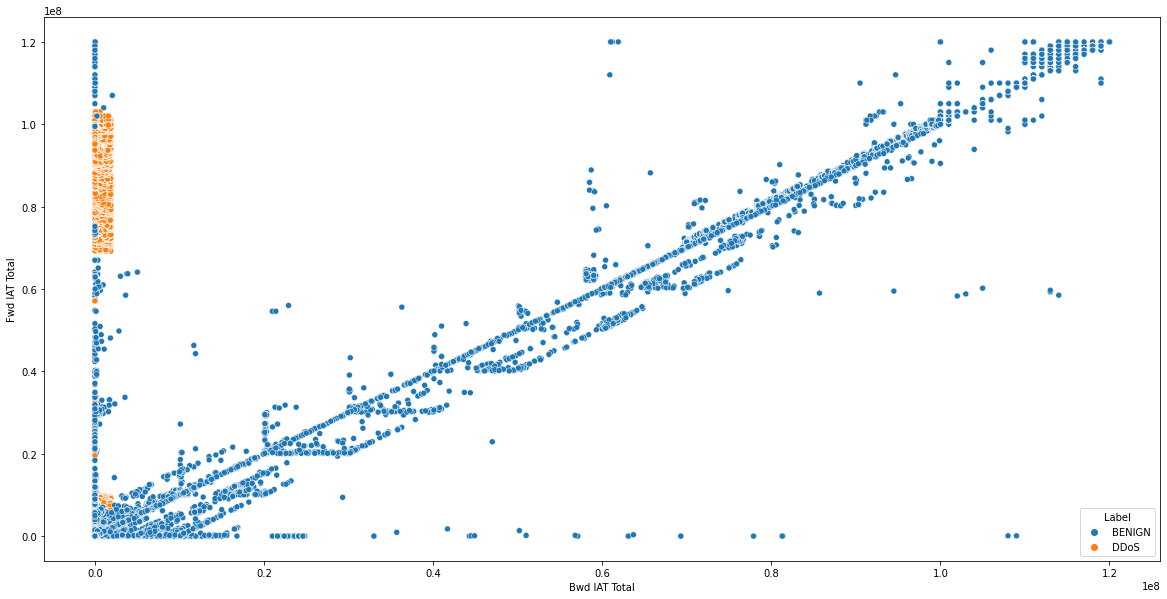

In [57]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='Bwd IAT Total', y= 'Fwd IAT Total', hue= 'Label', data = df)

<AxesSubplot:xlabel='Idle Mean', ylabel='Active Mean'>

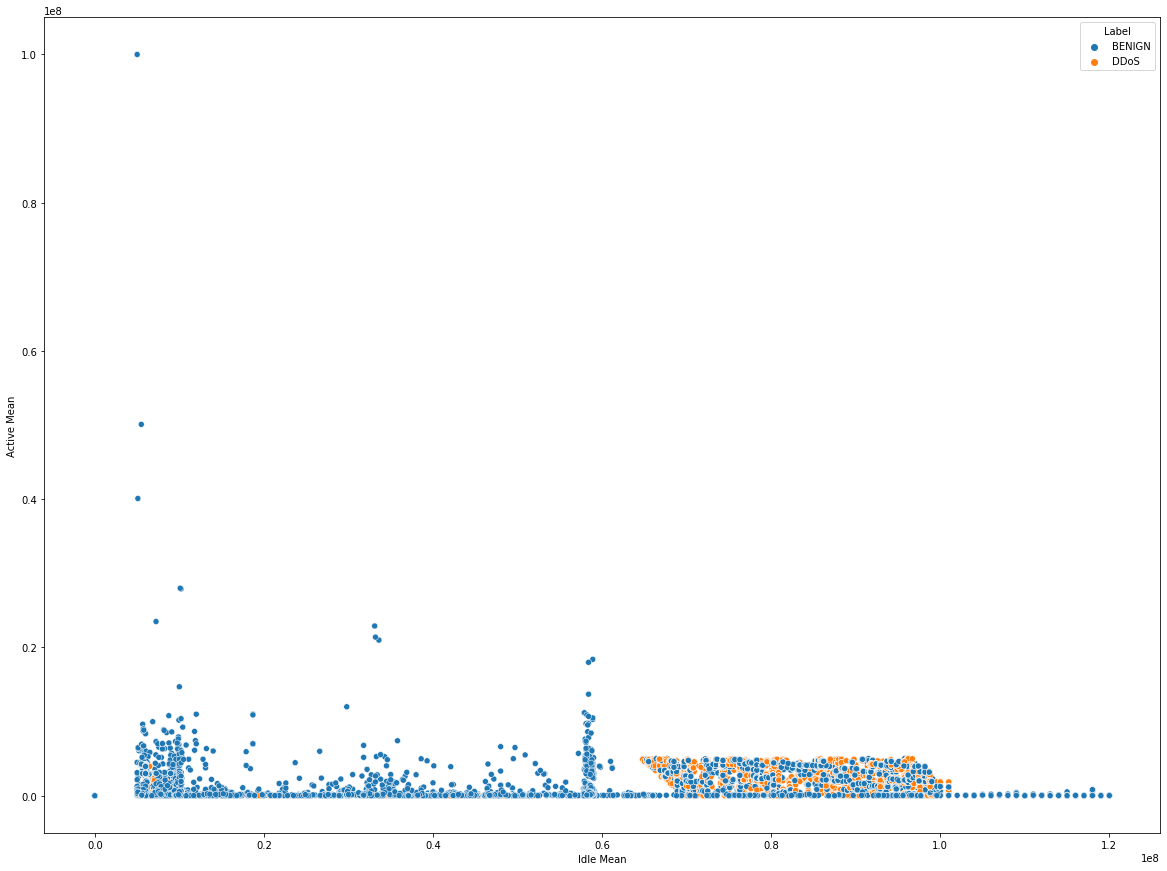

In [58]:
plt.figure(figsize=(20,15))
sns.scatterplot(x = 'Idle Mean', y= 'Active Mean', hue= 'Label', data = df)

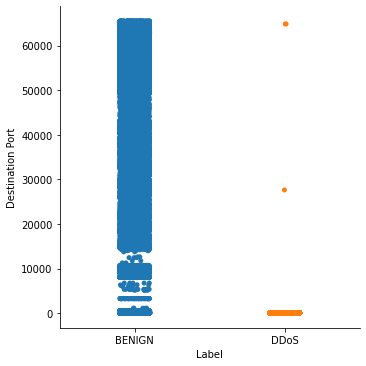

In [21]:
sns.catplot(x='Label', y= 'Destination Port',data = df)

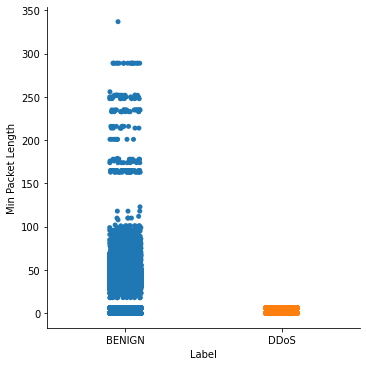

In [59]:
sns.catplot(x='Label', y= 'Min Packet Length', data = df)

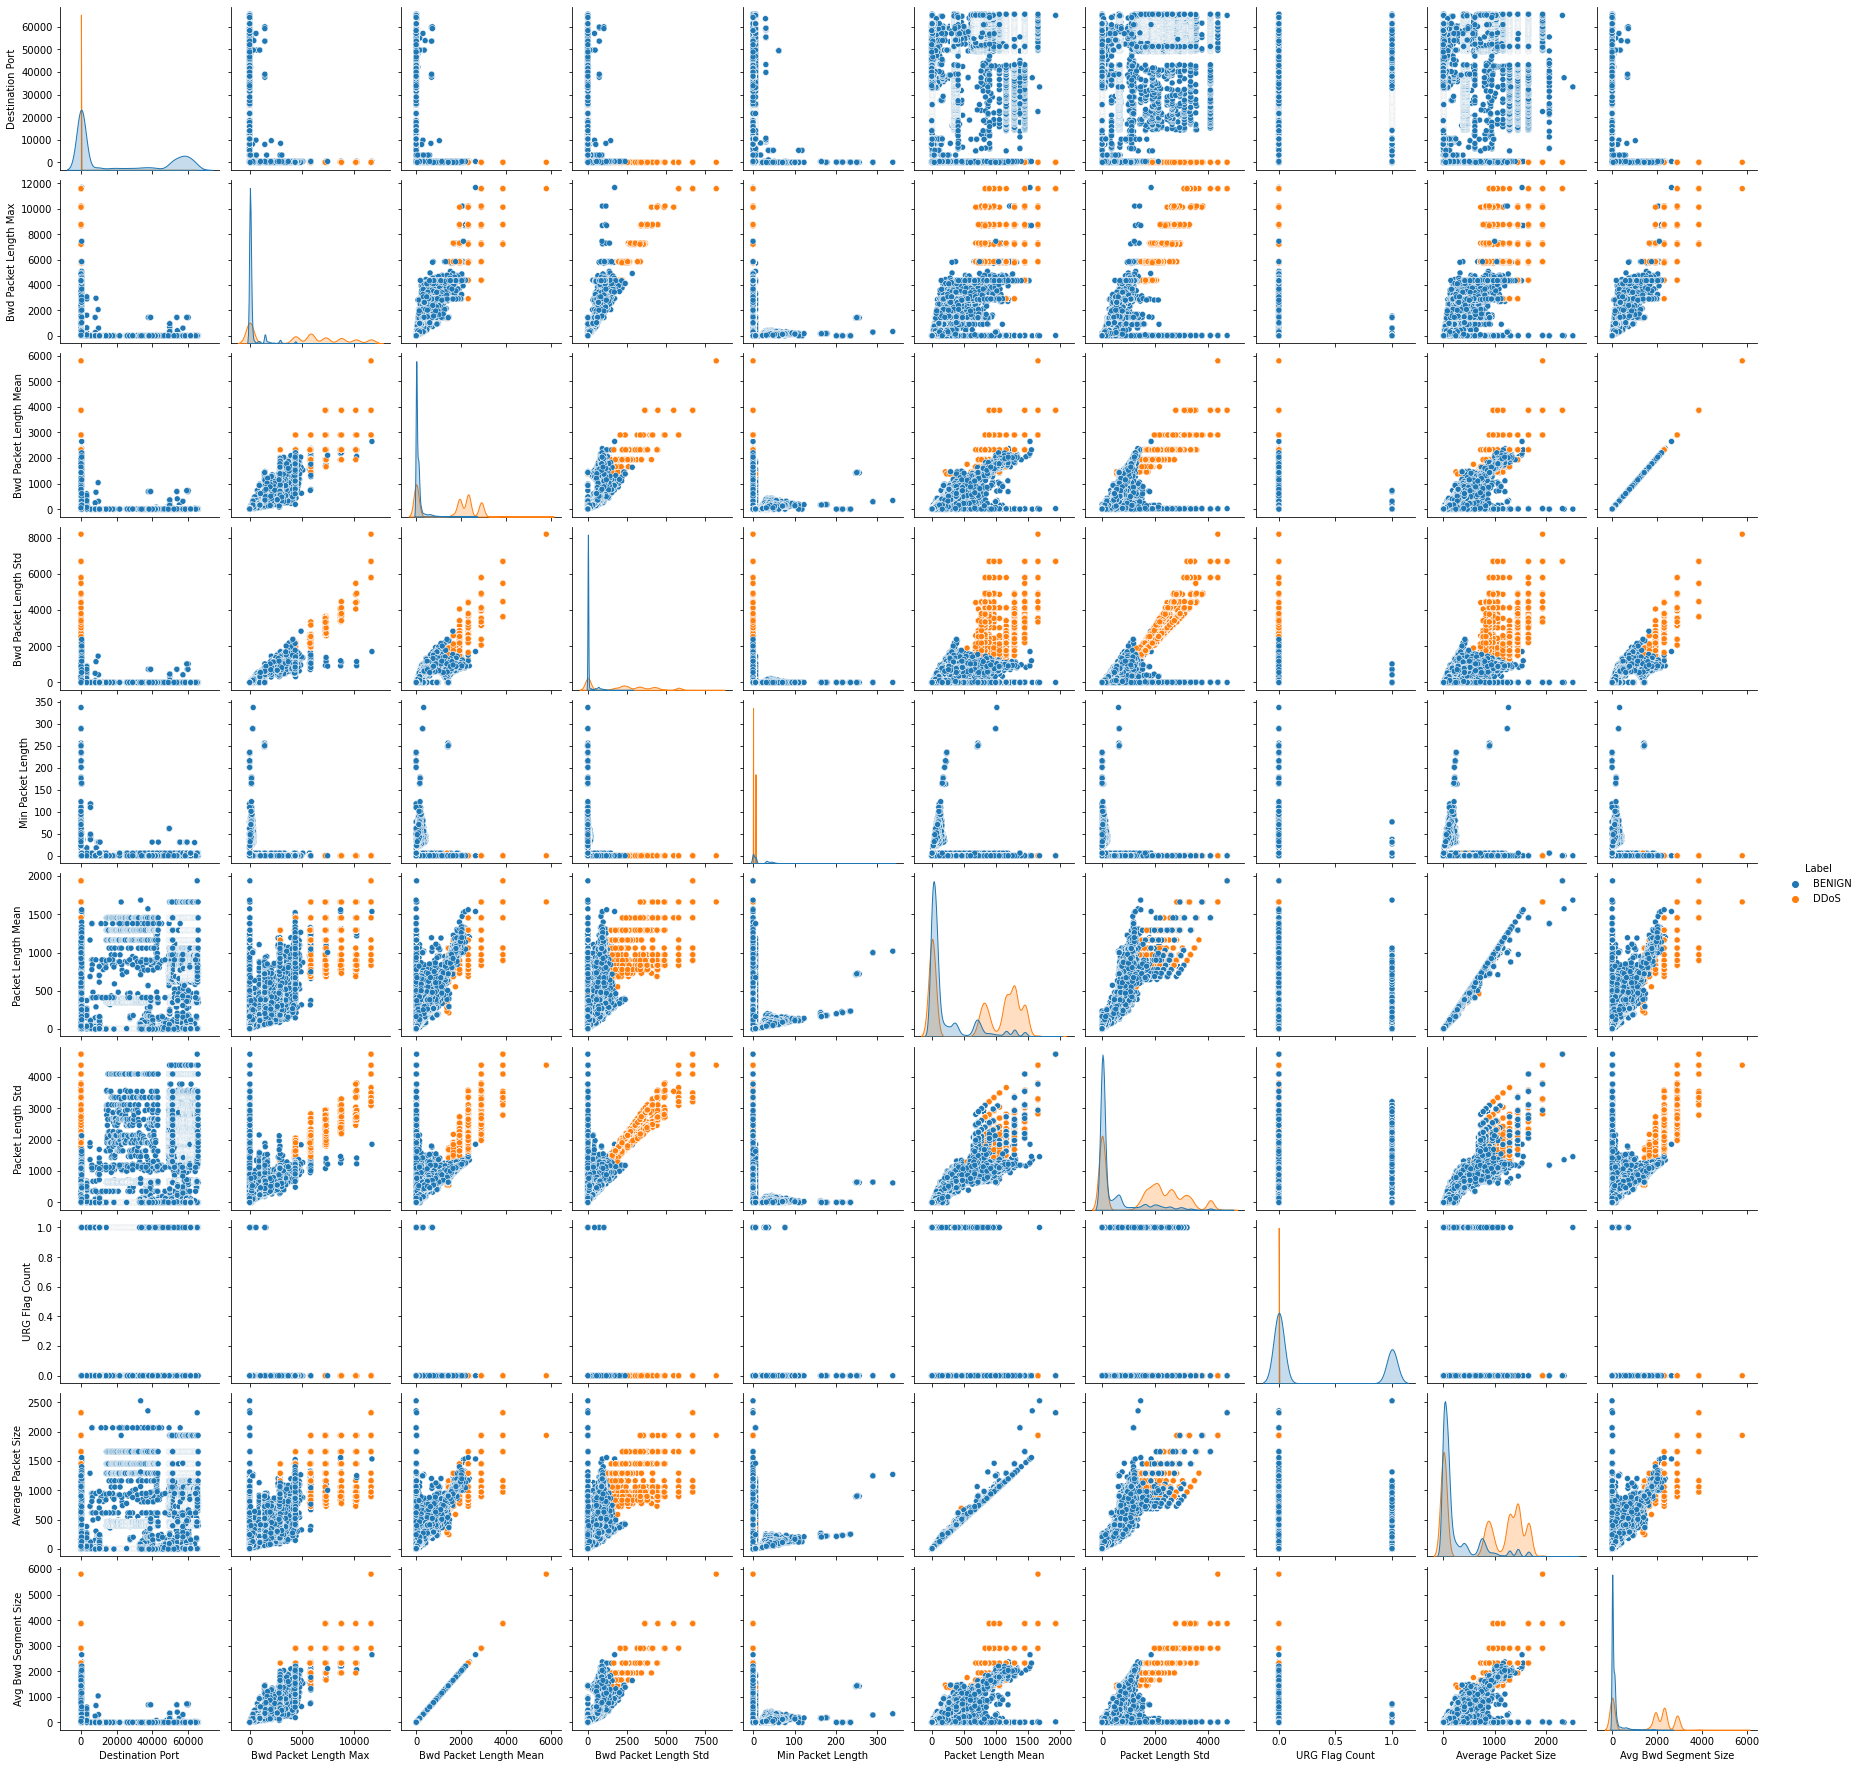

In [109]:
sns.pairplot(df[['Destination Port', 'Bwd Packet Length Max', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Min Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'URG Flag Count', 'Average Packet Size',
       'Avg Bwd Segment Size','Label']], hue="Label")

In [14]:
df = df[['Destination Port', 'Bwd Packet Length Max', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Min Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'URG Flag Count', 'Average Packet Size',
       'Avg Bwd Segment Size','Label']]

# Data Preprocessing

In [15]:
label_encoder = LabelEncoder()

df['Label'] = label_encoder.fit_transform(df['Label'])
df.Label.astype('category')

0         0
1         0
2         0
3         0
4         0
         ..
225740    0
225741    0
225742    0
225743    0
225744    0
Name: Label, Length: 225745, dtype: category
Categories (2, int64): [0, 1]

In [16]:
X = df.drop(['Label'],axis=1)
y = df['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=42)

In [17]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(f_classif, k =10)
selector.fit(abs(X), y)
X.columns[selector.get_support()]

C:\Users\Latif\AppData\Roaming\Python\Python37\site-packages\sklearn\feature_selection\_univariate_selection.py:115: UserWarning: Features [29 30 31 47 54 55 56 57 58 59] are constant.
  UserWarning)
C:\Users\Latif\AppData\Roaming\Python\Python37\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Index(['Destination Port', 'Bwd Packet Length Max', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Min Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'URG Flag Count', 'Average Packet Size',
       'Avg Bwd Segment Size'],
      dtype='object')

In [18]:
df[['Destination Port', 'Bwd Packet Length Max', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Min Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'URG Flag Count', 'Average Packet Size',
       'Avg Bwd Segment Size']]

,Destination Port,Bwd Packet Length Max,Bwd Packet Length Mean,Bwd Packet Length Std,Min Packet Length,Packet Length Mean,Packet Length Std,URG Flag Count,Average Packet Size,Avg Bwd Segment Size
0,54865,0,0,0,6,6,0,0,9,0
1,55054,6,6,0,6,6,0,1,9,6
2,55055,6,6,0,6,6,0,1,9,6
3,46236,6,6,0,6,6,0,1,9,6
4,54863,0,0,0,6,6,0,0,9,0
...,...,...,...,...,...,...,...,...,...,...
225740,61374,6,6,0,6,6,0,1,9,6
225741,61378,6,6,0,6,6,0,1,9,6
225742,61375,6,6,0,6,6,0,1,9,6
225743,61323,0,0,0,6,6,0,0,9,0


In [19]:
iso = IsolationForest(contamination=0.1)
yhat = iso.fit_predict(np.array(X_train))
pred = yhat != -1
X_train, y_train = (np.array(X_train))[pred, :],(np.array(y_train))[pred]
print(X_train.shape, y_train.shape)

(142219, 76) (142219,)


In [20]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [21]:
rf = RandomForestClassifier()

accuracy = cross_val_score(estimator=rf,X= X_train, y=y_train,cv = 10)

print('Accuracy:', accuracy.mean()*100)
print('Std %:', accuracy.std()*100)

Accuracy: 99.988749725329
Std %: 0.0084376648054806


In [22]:
dtr = DecisionTreeClassifier()

accuracy = cross_val_score(estimator=dtr,X= X_train, y=y_train,cv = 10)

print('Accuracy:', accuracy.mean()*100)
print('Std %:', accuracy.std()*100)

Accuracy: 99.98242150145049
Std %: 0.008466837427698253


In [24]:
knn = KNeighborsClassifier()

accuracy = cross_val_score(estimator=knn,X= X_train, y=y_train,cv = 10)

print('Accuracy:', accuracy.mean()*100)
print('Std %:', accuracy.std()*100)

Accuracy: 99.95992095210853
Std %: 0.01752209422935965


In [23]:
svc = SVC()

accuracy = cross_val_score(estimator=svc,X= X_train, y=y_train,cv = 10)

print('Accuracy:', accuracy.mean()*100)
print('Std %:', accuracy.std()*100)

Accuracy: 99.91070123527955
Std %: 0.014765220075199035


In [25]:
nb = GaussianNB()

accuracy = cross_val_score(estimator=nb,X= X_train, y=y_train,cv = 10)

print('Accuracy:', accuracy.mean()*100)
print('Std %:', accuracy.std()*100)

Accuracy: 98.82505165782517
Std %: 0.09508802573201497


# Data Modelling and Hyperparameters

In [28]:

rf = RandomForestClassifier()

rf.fit(X_train, y_train)

rf_y_pred = rf.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,rf_y_pred))

print('Accuracy:', rf.score(X_test, y_test))
print('RMSE:', rmse)
print('\nClassification Report\n', classification_report(rf_y_pred, y_test))


Accuracy: 0.9989811588210974
RMSE Error: 0.03191929164161706

Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     29319
           1       1.00      1.00      1.00     38405

    accuracy                           1.00     67724
   macro avg       1.00      1.00      1.00     67724
weighted avg       1.00      1.00      1.00     67724



Text(0.5, 1.0, 'Confusion Matrix of Random Forest Classifier')

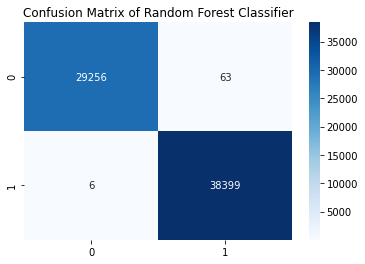

In [42]:
cm = confusion_matrix(rf_y_pred,y_test)

sns.heatmap(cm, annot=True, fmt='.5g', cmap='Blues')
plt.title('Confusion Matrix of Random Forest Classifier')


In [35]:
from sklearn.model_selection import RandomizedSearchCV


rf_params = {'max_depth': np.arange(1,10,1),
            'max_features': np.arange(1,20,2),
            'n_estimators' : np.arange(100,1000,100)}

rf = RandomForestClassifier()

rf_cv_model = RandomizedSearchCV(estimator=rf, param_distributions = rf_params,
                               cv = 10, n_jobs=-1)

rf_cv_model.fit(X_train, y_train)

print(rf_cv_model.best_params_["max_depth"])
print(rf_cv_model.best_params_["max_features"])
print(rf_cv_model.best_params_["n_estimators"])

8
1
500


In [36]:
rf_tuned = RandomForestClassifier(max_depth = rf_cv_model.best_params_["max_depth"],
                                max_features = rf_cv_model.best_params_["max_features"],
                                n_estimators = rf_cv_model.best_params_["n_estimators"])

rf_tuned.fit(X_train, y_train)

rf_tuned_y_pred = rf_tuned.predict(X_test)

print(np.sqrt(mean_squared_error(y_test, rf_tuned_y_pred)))

0.026343751949726726


Text(0.5, 1.0, 'Confusion Matrix of Random Forest Classifier with Hyperparameter')

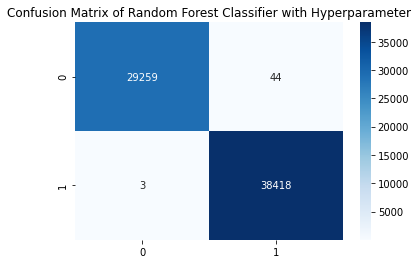

In [37]:
cm = confusion_matrix(rf_tuned_y_pred,y_test)

sns.heatmap(cm, annot=True, fmt='.5g', cmap='Blues')
plt.title('Confusion Matrix of Random Forest Classifier with Hyperparameter')

In [38]:
dtc = DecisionTreeClassifier()

dtc.fit(X_train, y_train)

dtc_y_pred = dtc.predict(X_test)
dtc_rmse = np.sqrt(mean_squared_error(y_test,dtc_y_pred))

print('Accuracy:', dtc.score(X_test, y_test))
print('RMSE :', dtc_rmse)
print('\nClassification Report\n', classification_report(dtc_y_pred, y_test))


Accuracy: 0.9989811588210974
RMSE Error: 0.03191929164161706

Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     29321
           1       1.00      1.00      1.00     38403

    accuracy                           1.00     67724
   macro avg       1.00      1.00      1.00     67724
weighted avg       1.00      1.00      1.00     67724



Text(0.5, 1.0, 'Decision Tree Classifier Confusion Matrix')

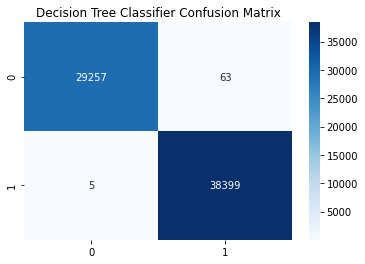

In [39]:
cm = confusion_matrix(dtc_y_pred,y_test)

sns.heatmap(cm, annot=True, fmt='.5g', cmap='Blues')
plt.title('Decision Tree Classifier Confusion Matrix')

In [55]:
dtr_params = {"min_samples_split": range(2,25),
               "max_leaf_nodes": range(2,35)}

dtr = DecisionTreeClassifier()

dtr_cv_model = RandomizedSearchCV(dtr, dtr_params, cv = 10, n_jobs=-1)

dtr_cv_model.fit(X_train, y_train)

print(dtr_cv_model.best_params_["min_samples_split"])
print(dtr_cv_model.best_params_["max_leaf_nodes"])

3
33


In [56]:
dtr_tuned = DecisionTreeClassifier(min_samples_split = dtr_cv_model.best_params_["min_samples_split"],
                                max_leaf_nodes=dtr_cv_model.best_params_["max_leaf_nodes"])

dtr_tuned.fit(X_train, y_train)

dtr_tuned_y_pred = dtr_tuned.predict(X_test)

print('Accuracy: ', accuracy_score(y_test, dtr_tuned_y_pred))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, dtr_tuned_y_pred)))

Accuracy:  0.9989959246352844
RMSE:  0.03168714825786016


Text(0.5, 1.0, 'Confusion Matrix of Decision Tree Classifier with Hyperparameter')

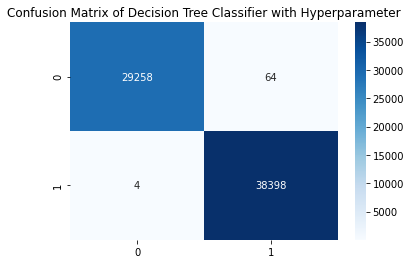

In [57]:
cm = confusion_matrix(dtr_tuned_y_pred,y_test)

sns.heatmap(cm, annot=True, fmt='.5g', cmap='Blues')
plt.title('Confusion Matrix of Decision Tree Classifier with Hyperparameter')

In [65]:
knn = KNeighborsClassifier()

knn.fit(X_train, y_train)

knn_y_pred = knn.predict(X_test)
knn_rmse = np.sqrt(mean_squared_error(y_test,knn_y_pred))

print('Accuracy:', knn.score(X_test, y_test))
print('RMSE Error:', knn_rmse)
print('\nClassification Report\n', classification_report(knn_y_pred, y_test))


Accuracy: 0.997475045774024
RMSE Error: 0.050248922634978155

Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     29181
           1       1.00      1.00      1.00     38543

    accuracy                           1.00     67724
   macro avg       1.00      1.00      1.00     67724
weighted avg       1.00      1.00      1.00     67724



Text(0.5, 1.0, 'KNeighborsClassifier Confusion Matrix')

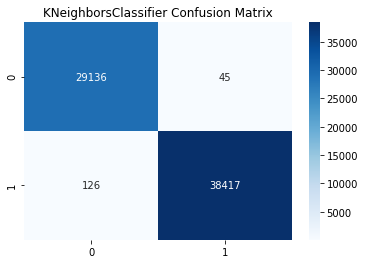

In [66]:
cm = confusion_matrix(knn_y_pred,y_test)

sns.heatmap(cm, annot=True, fmt='.5g', cmap='Blues')
plt.title('KNeighborsClassifier Confusion Matrix')

In [67]:
knn_params = {'n_neighbors': np.arange(1,10,1), 
              'metric':['manhattan','euclidean','minkowski']}

knn = KNeighborsClassifier()

knn_cv_model = RandomizedSearchCV(knn, knn_params, cv = 10, n_jobs=-1)

knn_cv_model.fit(X_train, y_train)

print(knn_cv_model.best_params_["n_neighbors"])
print(knn_cv_model.best_params_["metric"])

8
minkowski


In [68]:
knn_tuned = KNeighborsClassifier(n_neighbors = knn_cv_model.best_params_["n_neighbors"],
                                metric=knn_cv_model.best_params_["metric"])

knn_tuned.fit(X_train, y_train)

knn_tuned_y_pred = knn_tuned.predict(X_test)

print('Accuracy:', accuracy_score(y_test, knn_tuned_y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, knn_tuned_y_pred)))

Accuracy: 0.9984348236961786
RMSE: 0.0395623091315635


Text(0.5, 1.0, 'Confusion Matrix of KNeighborsClassifier with Hyperparameter')

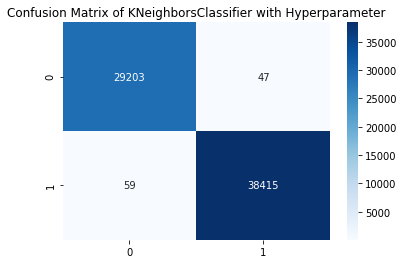

In [69]:
cm = confusion_matrix(knn_tuned_y_pred,y_test)

sns.heatmap(cm, annot=True, fmt='.5g', cmap='Blues')
plt.title('Confusion Matrix of KNeighborsClassifier with Hyperparameter')

In [70]:
svc = SVC()

svc.fit(X_train, y_train)

svc_y_pred = svc.predict(X_test)
svc_rmse = np.sqrt(mean_squared_error(y_test,svc_y_pred))

print('Accuracy:', svc.score(X_test, y_test))
print('RMSE Error:', svc_rmse)
print('\nClassification Report\n', classification_report(svc_y_pred, y_test))



Accuracy: 0.9784714429153624
RMSE Error: 0.14672612952244615

Classification Report
               precision    recall  f1-score   support

           0       0.96      0.99      0.97     28090
           1       1.00      0.97      0.98     39634

    accuracy                           0.98     67724
   macro avg       0.98      0.98      0.98     67724
weighted avg       0.98      0.98      0.98     67724



Text(0.5, 1.0, 'Confusion Matrix of Support Vector Classification')

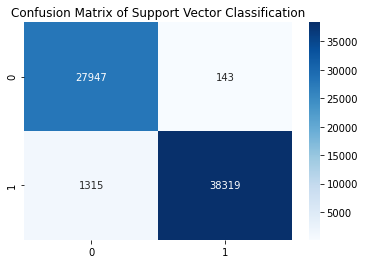

In [71]:
cm = confusion_matrix(svc_y_pred,y_test)

sns.heatmap(cm, annot=True, fmt='.5g', cmap='Blues')
plt.title('Confusion Matrix of Support Vector Classification')

In [27]:
svc_params = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
  
svc = SVC()

    
svc_cv_model = RandomizedSearchCV(svc, svc_params, cv = 5, n_jobs=-1)

svc_cv_model.fit(X_train, y_train)
  
print(svc_cv_model.best_params_["C"])
print(svc_cv_model.best_params_["gamma"])
print(svc_cv_model.best_params_["kernel"])

10
0.1
rbf


In [28]:
svc_tuned = SVC(C=svc_cv_model.best_params_["C"],
                gamma=svc_cv_model.best_params_["gamma"],
               kernel=svc_cv_model.best_params_["kernel"]
               )

svc_tuned.fit(X_train, y_train)

svc_tuned_y_pred = svc_tuned.predict(X_test)

print('Accuracy:', accuracy_score(y_test, svc_tuned_y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, svc_tuned_y_pred)))

Accuracy: 0.9988187348650405
RMSE: 0.0343695378927262


In [29]:
accuracy_score(svc_tuned_y_pred,y_test)

0.9988187348650405

Text(0.5, 1.0, 'Confusion Matrix of Support Vector Classification with Hyperparameters')

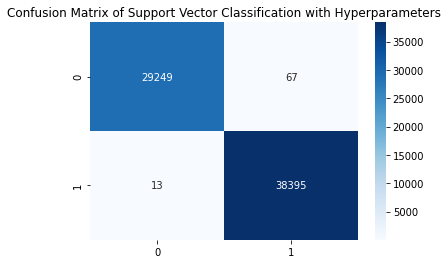

In [31]:
cm = confusion_matrix(svc_tuned_y_pred,y_test)

sns.heatmap(cm, annot=True, fmt='.5g', cmap='Blues')
plt.title('Confusion Matrix of Support Vector Classification with Hyperparameters')

In [32]:
nb = GaussianNB()

nb.fit(X_train, y_train)

nb_y_pred = nb.predict(X_test)
nb_rmse = np.sqrt(mean_squared_error(y_test,nb_y_pred))

print('Accuracy:', nb.score(X_test, y_test))
print('RMSE Error:', nb_rmse)
print('\nClassification Report\n', classification_report(nb_y_pred, y_test))


Accuracy: 0.9887632154036974
RMSE Error: 0.10600370086135032

Classification Report
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     28597
           1       1.00      0.98      0.99     39127

    accuracy                           0.99     67724
   macro avg       0.99      0.99      0.99     67724
weighted avg       0.99      0.99      0.99     67724



Text(0.5, 1.0, 'Confusion Matrix of Naive Bayes')

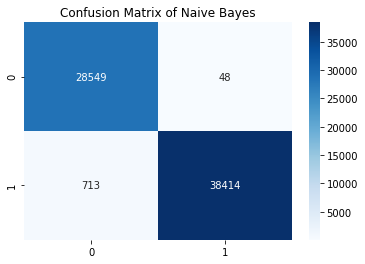

In [33]:
cm = confusion_matrix(nb_y_pred,y_test)

sns.heatmap(cm, annot=True, fmt='.5g', cmap='Blues')
plt.title('Confusion Matrix of Naive Bayes')

In [34]:
accuracy_score(nb_y_pred,y_test)

0.9887632154036974